In [1]:
!pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam


In [3]:
import tensorflow as tf
import pandas as pd
 
###########################
# 데이터를 준비합니다. 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print(x_train.shape, y_train.shape)

 


170498071/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3) (50000, 1)


In [4]:
# 기존 AlexNet과 동일하게 구성


# Convert labels to categorical format
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Create data generators
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.1)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Set generator parameters
batch_size = 100

# Create train, validation, and test generators
train_generator = train_datagen.flow(x_train, y_train,
                                     batch_size=batch_size,
                                     subset="training")

valid_generator = train_datagen.flow(x_train, y_train,
                                     batch_size=batch_size,
                                     subset="validation")

test_generator = test_datagen.flow(x_test, y_test,
                                   batch_size=batch_size)


In [5]:
###########################
# 모델을 완성합니다. 
X = tf.keras.layers.Input(shape=[32, 32, 3])
 
H = tf.keras.layers.Conv2D(6, kernel_size=5, activation='tanh')(X)
H = tf.keras.layers.AveragePooling2D()(H) 

H = tf.keras.layers.Conv2D(16, kernel_size=5, activation='tanh')(H)
H = tf.keras.layers.AveragePooling2D()(H) 

H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(120, activation='tanh')(H)
H = tf.keras.layers.Dense(84, activation='tanh')(H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)
 

In [6]:
 
model = tf.keras.models.Model(X, Y)

#모델 compile도 alexNet과 통일 -> adam으로 통일

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
 

In [7]:
###########################
epochs_num = 30

history = model.fit_generator(
    train_generator, 
    steps_per_epoch=train_generator.n//train_generator.batch_size,
    validation_data=valid_generator,
    validation_steps=valid_generator.n//valid_generator.batch_size,
    shuffle=True,
    epochs=epochs_num)


<ipython-input-7-d14576a545c9>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
450/450 [==============================] - 18s 12ms/step - loss: 1.8385 - accuracy: 0.3477 - val_loss: 1.6942 - val_accuracy: 0.3956
Epoch 2/30
450/450 [==============================] - 5s 11ms/step - loss: 1.6613 - accuracy: 0.4135 - val_loss: 1.5914 - val_accuracy: 0.4356
Epoch 3/30
450/450 [==============================] - 5s 12ms/step - loss: 1.5401 - accuracy: 0.4536 - val_loss: 1.4964 - val_accuracy: 0.4652
Epoch 4/30
450/450 [==============================] - 5s 10ms/step - loss: 1.4506 - accuracy: 0.4858 - val_loss: 1.4137 - val_accuracy: 0.5038
Epoch 5/30
450/450 [==============================] - 6s 13ms/step - loss: 1.3824 - accuracy: 0.5083 - val_loss: 1.3795 - val_accuracy: 0.5124
Epoch 6/30
450/450 [==============================] - 5s 11ms/step - loss: 1.3331 - accuracy: 0.5270 - val_loss: 1.3556 - val_accuracy: 0.5218
Epoch 7/30
450/450 [==============================] - 5s 12ms/step - loss: 1.2858 - accuracy: 0.5434 - val_loss: 1.3157 - val_accuracy: 0.540

In [8]:
# 모델 확인
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0     

In [9]:
import matplotlib.pyplot as plt

# 학습 과정에서 계산한 정확도와 손실을 변수로 저장
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

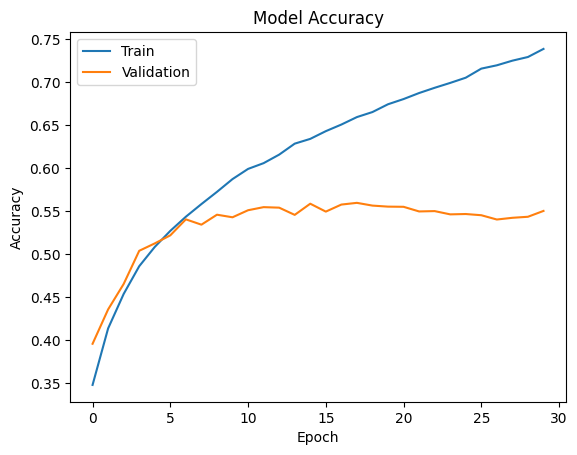

In [10]:
# 정확도 그래프
plt.plot(acc)
plt.plot(val_acc)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

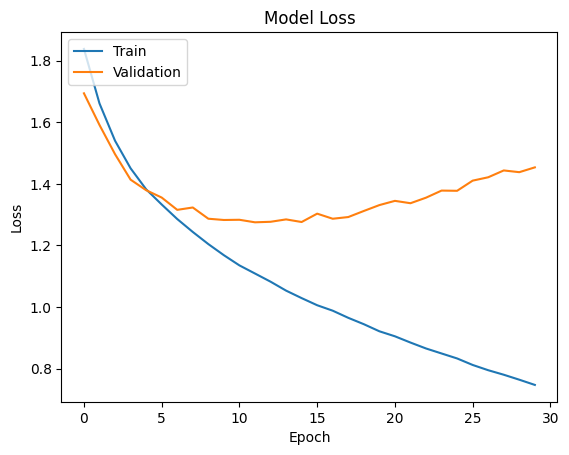

In [11]:
# 손실 그래프
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [12]:
# model evaluation
print("-- Evaluate --")
scores = model.evaluate_generator(test_generator, steps=test_generator.n//test_generator.batch_size)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --


<ipython-input-12-8190f70dd792>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_generator, steps=test_generator.n//test_generator.batch_size)


accuracy: 54.46%
